### 요약
1. OHLC 각각의 가격 데이터
  - 데이터의 추세가 뚜렷하여 decompose 후 잔차값으로 자기상관관계 추출
  - 잔차의 자기상관에 대해 :  
    - 전부 lag = 1 (하루 전) 값에 대해 양의 상관관계가 있었다 (> 0.5)
    - lag = 5 일때 약한 음의 상관관계가 있었다 (-0.3 내외)    
    
        
2. 월말 종가 평균
  - 잔차에 대해 lag = 1 (1달 전) 일 때 약한 양의 상관관계가 있음  
  
  
3. 종가 변화율
  - 자기상관관계가 없음(백색잡음)
  - 잔차는 lag = 5 (5일 전)일때 약하게 음의 상관관계가 있다  
  - 기타
    - 시가 변화율의 잔차 : lag = 4 (음) lag = 7 (양)
    - 고가 변화율의 잔차 : lag = 3 (음)
    - 저가 변화율의 잔차 : lag = 5 (음)  
  
  
4. 거래량
  - 잔차는 lag = 3 (3일 전)일 때 약한 음의 상관관계가 있다  
  
  
5. OHLC 평균값
  - 잔차는 lag = 1 (1일 전) 일 때 양의 상관관계, lag = 5 일 때 음의 상관관계  
  
  
6. OHLC 평균값의 변화율
  - 잔차는 lag = 3, 5 일 때 음의 상관관계, lag = 7 일때 양의 상관관계
  

### 결론
> 삼성전자의 주가는 별다른 이슈가 없을 경우   
  하루 전의 가격에 큰 영향을 받으며(익히 알고있는 사실),   
  5일 전의 가격과 반대로 움직일 가능성이 있다(검증되지 않은 부분)
  

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf 
from pandas.plotting import autocorrelation_plot
from scipy.stats import linregress
from pandas_datareader import data, wb
import datetime
import talib
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
# 시각화 사용자 설정
import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
%matplotlib inline

In [17]:
def graph(df, cols) :
    rcParams['figure.figsize'] = 11.7,8.27
    ax = sns.lineplot(data=df[cols])
    
    plt.title('compare : ' + (', '.join(cols)), fontsize=20)
    plt.ylabel('Value', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=12, loc='best')
    plt.show()
    return

# additive model : 계절 패턴의 크기가 데이터 값의 증가 또는 감소에 따라 증가하거나 감소할 때
# multiplicative model : 계절 패턴의 크기가 데이터 값과 상관 관계가 없을 때
def decompose(df, type='trend', period=12, model='additive') :
    result = df.copy()
    for col in df.columns :
        output = seasonal_decompose(df[col], model=model, period=period)
        if type == 'trend' :
            result[col] = output.trend
        elif type == 'residual' :
            result[col] = output.resid
    return result

def autocorrplt(df) :
    plot_acf(df, lags=len(df.index)-1)
    plt.show()
    autocorrelation_plot(df)
    plt.show()
    return

def autocorr(ser, lags) :
    for i in range(1, lags+1) :
       print(f"lag={i}, autocorr={ser.autocorr(lag=i)}") 
    return

In [3]:
# 삼성전자 주가 가져오기 : 2018년 6월부터
samsung = fdr.DataReader('005930', '2018-06')
samsung_open = samsung[['Open']]
samsung_high = samsung[['High']]
samsung_low = samsung[['Low']]
samsung_close = samsung[['Close']]
samsung_vol = samsung[['Volume']]
samsung_change = samsung[['Change']]

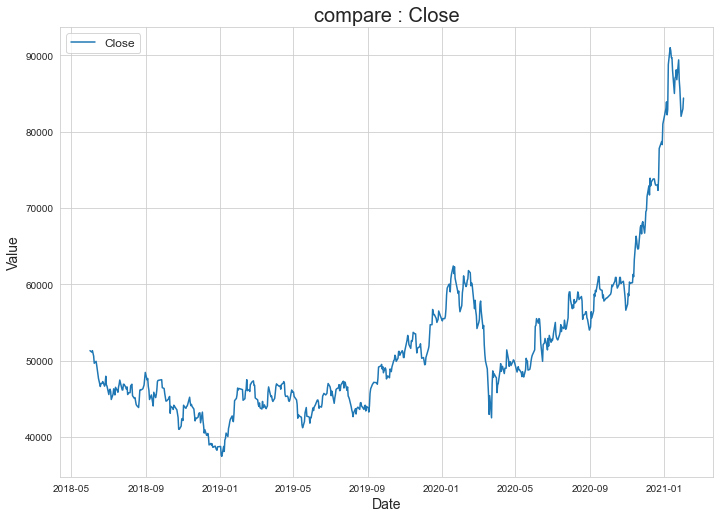

In [18]:
graph(samsung_close, ['Close'])

<ipython-input-5-3a33cf0d97c3>:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  output = seasonal_decompose(df[col], model='additive', freq=12)


lag=1, autocorr=0.5699583403637372
lag=2, autocorr=0.19770379835305768
lag=3, autocorr=-0.11362504782898167
lag=4, autocorr=-0.28936126896817654
lag=5, autocorr=-0.34586790057028033
lag=6, autocorr=-0.24291022706364374
lag=7, autocorr=-0.06996290366612037
lag=8, autocorr=0.012231749566909178
lag=9, autocorr=-0.016065519319854258
lag=10, autocorr=-0.10985600368829537


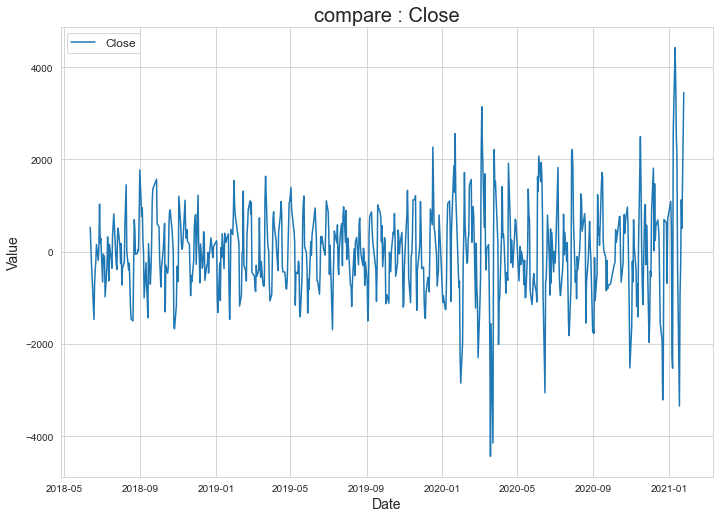

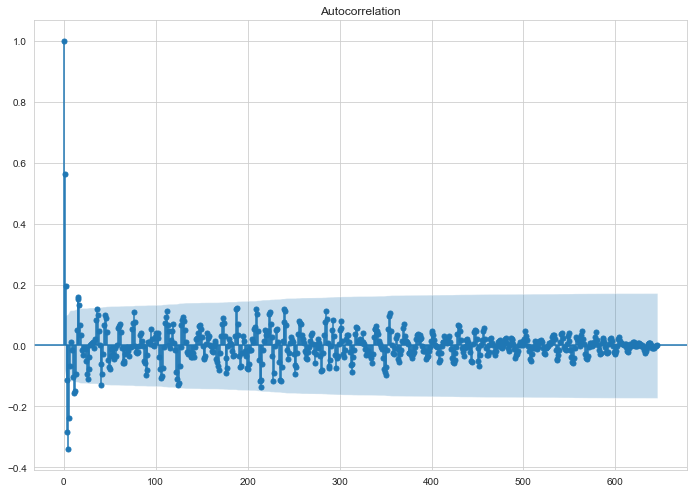

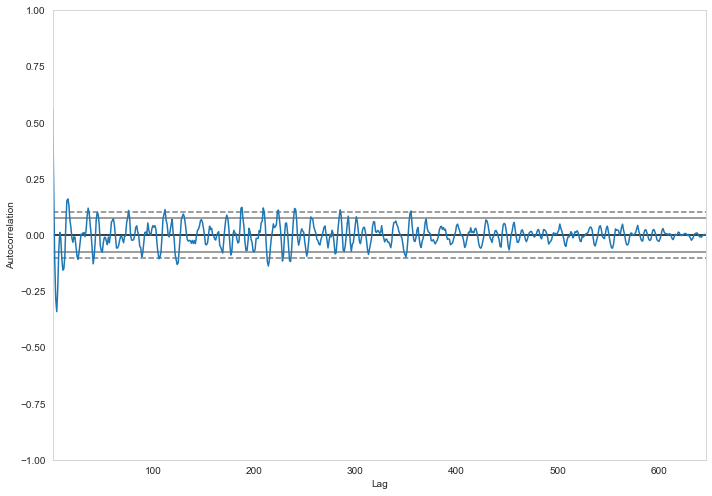

In [6]:
#종가의 잔차 : lag=1 일때 0.56 즉 하루 전 값이 의미있다
samsung_close_res = decompose(samsung_close, type='residual')
samsung_close_res.dropna(axis=0, inplace=True)

autocorr(samsung_close_res['Close'], 10)

graph(samsung_close_res, ['Close'])
autocorrplt(samsung_close_res)

<ipython-input-5-3a33cf0d97c3>:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  output = seasonal_decompose(df[col], model='additive', freq=12)


lag=1, autocorr=0.514589107581015
lag=2, autocorr=0.1406305677088001
lag=3, autocorr=-0.12773293272373706
lag=4, autocorr=-0.2909315311593504
lag=5, autocorr=-0.29868464962482605
lag=6, autocorr=-0.22215649187568484
lag=7, autocorr=-0.04292862632247321
lag=8, autocorr=-0.03490657547438079
lag=9, autocorr=-0.007695592790615933
lag=10, autocorr=-0.10042537471492394


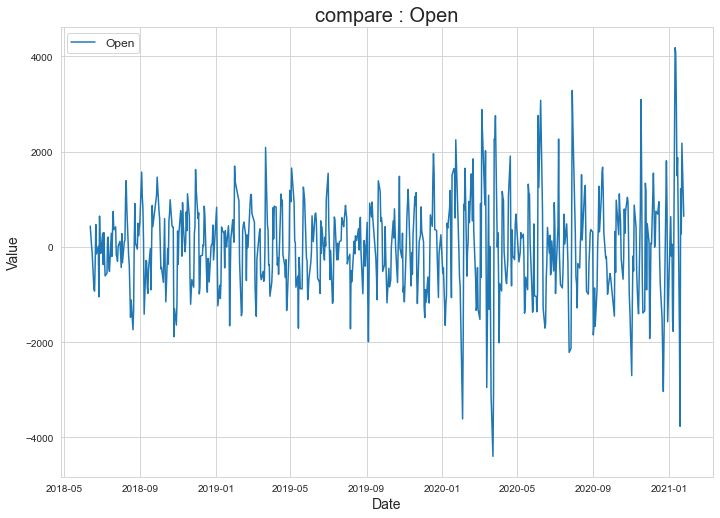

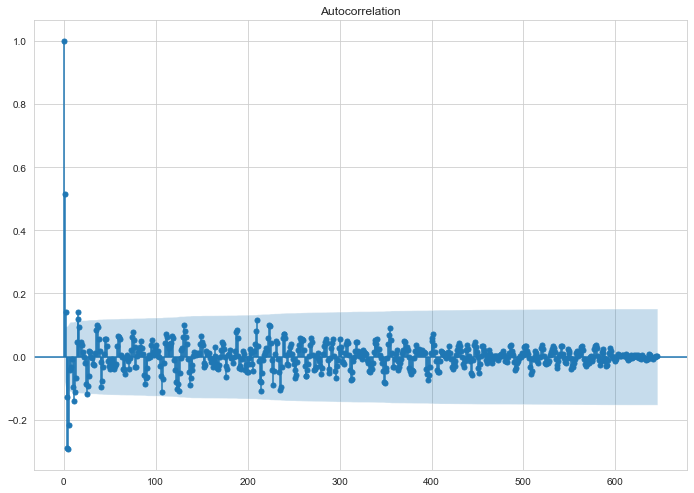

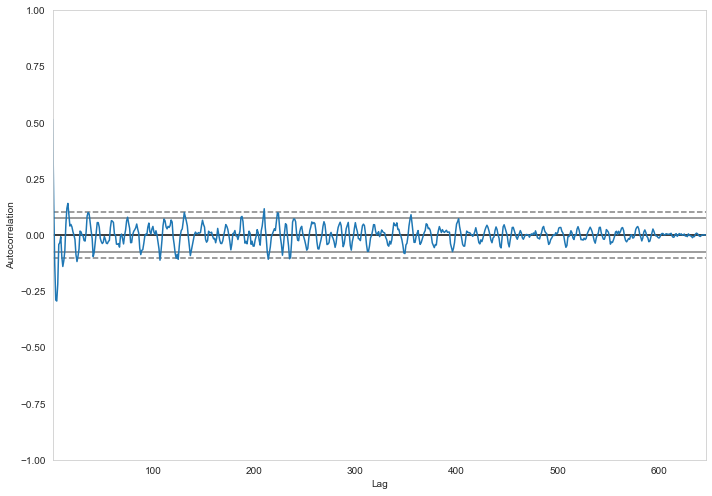

In [8]:
#시가의 잔차 : lag=1 0.51 하루 전 값이 의미있다
samsung_open_res = decompose(samsung_open, type='residual')
samsung_open_res.dropna(axis=0, inplace=True)

autocorr(samsung_open_res['Open'], 10)

graph(samsung_open_res, ['Open'])
autocorrplt(samsung_open_res)

<ipython-input-5-3a33cf0d97c3>:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  output = seasonal_decompose(df[col], model='additive', freq=12)


lag=1, autocorr=0.5875281556253766
lag=2, autocorr=0.15649178993839682
lag=3, autocorr=-0.13019966407525876
lag=4, autocorr=-0.2716697351042047
lag=5, autocorr=-0.3210566244069959
lag=6, autocorr=-0.2562272229863194
lag=7, autocorr=-0.08194452835595886
lag=8, autocorr=0.021564496456352115
lag=9, autocorr=0.024918171700815325
lag=10, autocorr=-0.09875007179868042


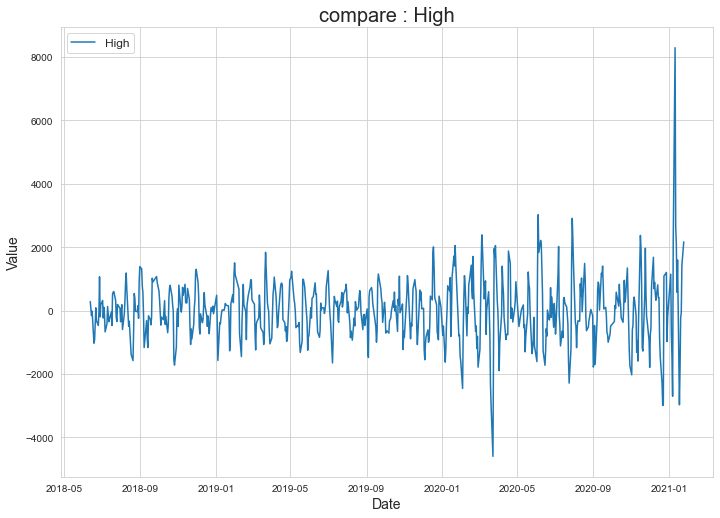

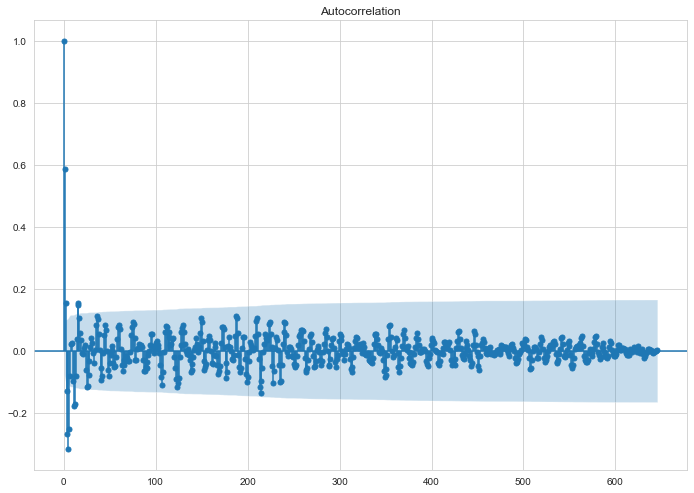

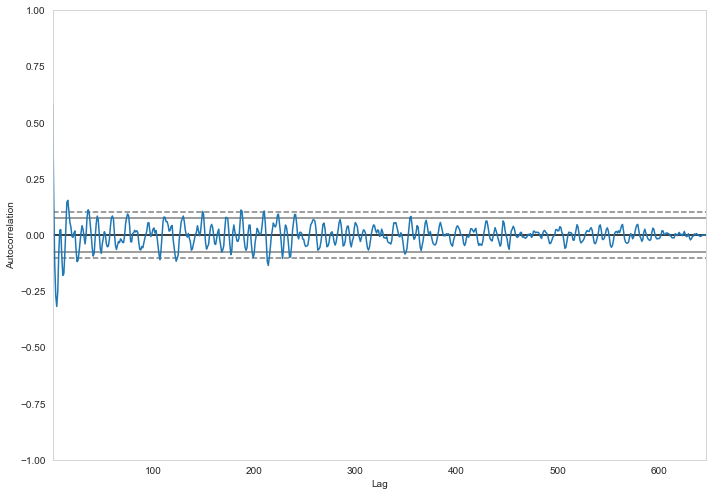

In [9]:
#고가의 잔차 : lag=1 0.58 하루 전 값이 의미있다
samsung_high_res = decompose(samsung_high, type='residual')
samsung_high_res.dropna(axis=0, inplace=True)

autocorr(samsung_high_res['High'], 10)

graph(samsung_high_res, ['High'])
autocorrplt(samsung_high_res)

<ipython-input-5-3a33cf0d97c3>:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  output = seasonal_decompose(df[col], model='additive', freq=12)


lag=1, autocorr=0.5930671022892899
lag=2, autocorr=0.20917008563671527
lag=3, autocorr=-0.10003222204062882
lag=4, autocorr=-0.2685688897062989
lag=5, autocorr=-0.34135580494480783
lag=6, autocorr=-0.2546923455511523
lag=7, autocorr=-0.08778223546727042
lag=8, autocorr=-0.04626095590039436
lag=9, autocorr=-0.07531754015269489
lag=10, autocorr=-0.138688244950994


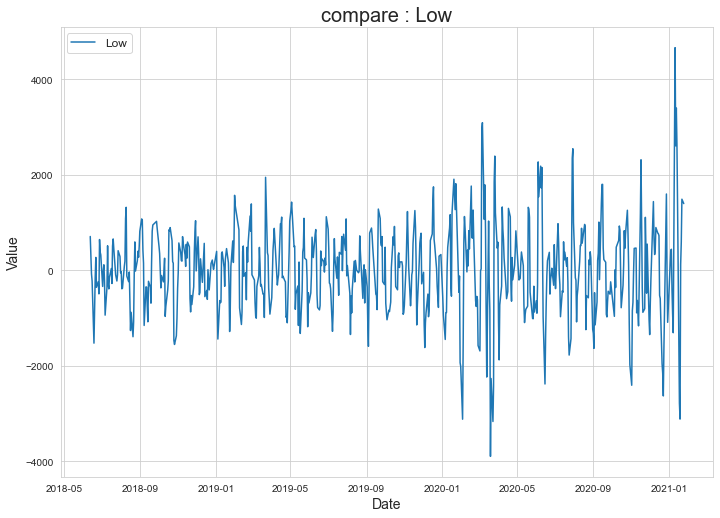

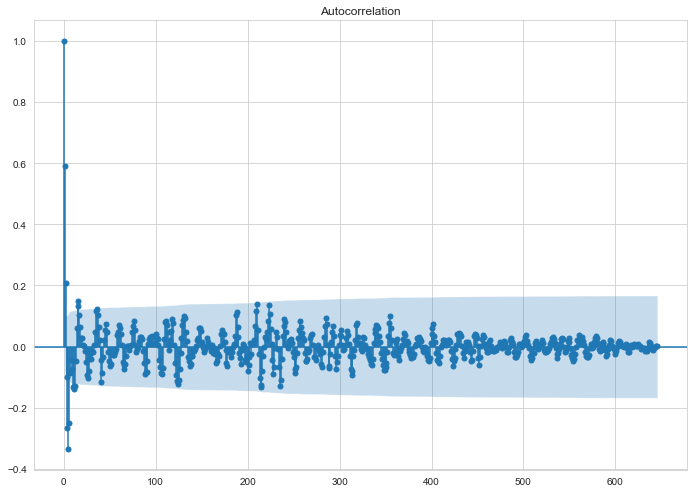

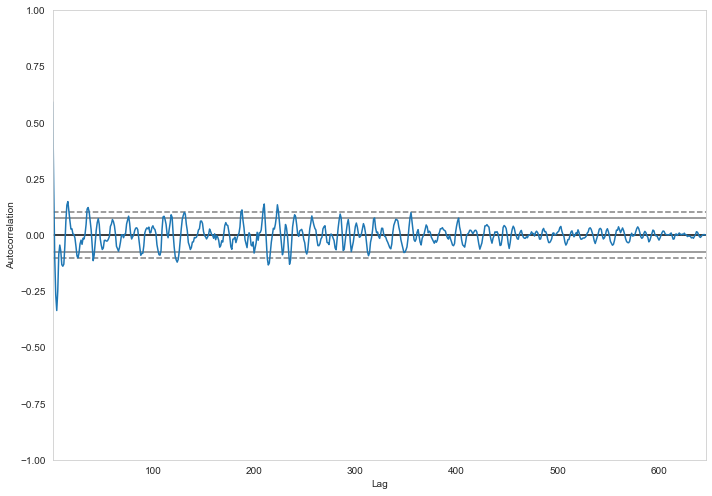

In [10]:
#저가의 잔차 : lag=1 0.59 하루 전 값이 의미있다
samsung_low_res = decompose(samsung_low, type='residual')
samsung_low_res.dropna(axis=0, inplace=True)

autocorr(samsung_low_res['Low'], 10)

graph(samsung_low_res, ['Low'])
autocorrplt(samsung_low_res)

lag=1, autocorr=0.938352905251027
lag=2, autocorr=0.8589271287135832
lag=3, autocorr=0.7656030828863502
lag=4, autocorr=0.6921759245778677
lag=5, autocorr=0.6462775313413929
lag=6, autocorr=0.5805330163345219
lag=7, autocorr=0.5359920255612626
lag=8, autocorr=0.46256165450712694
lag=9, autocorr=0.4323225013887941
lag=10, autocorr=0.5527267107177152


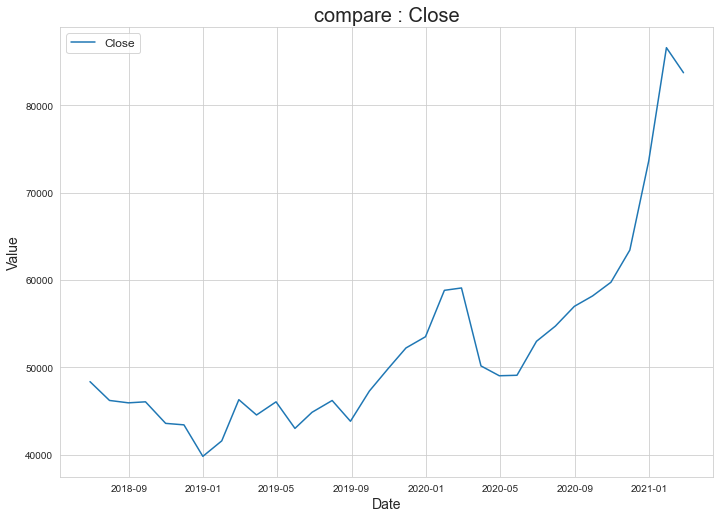

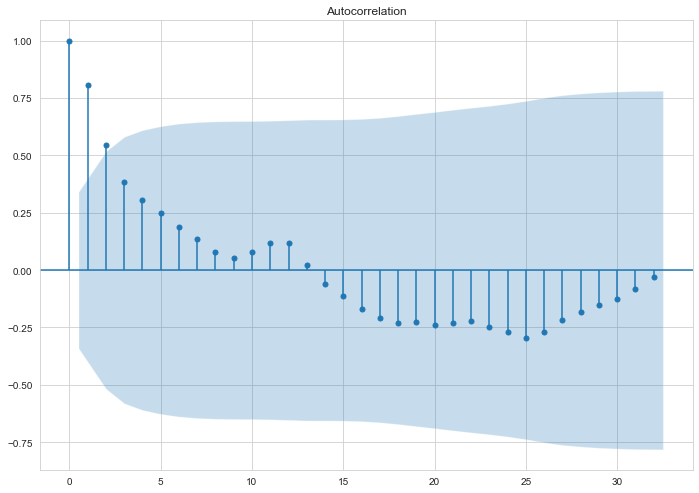

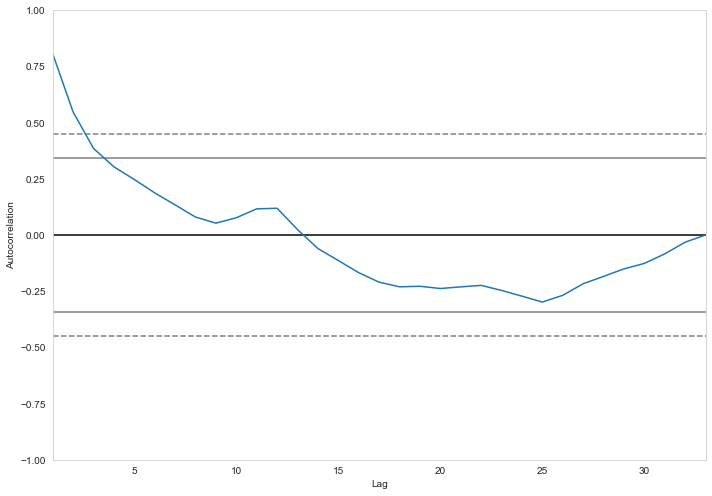

In [11]:
# 영업일 월말 종가 평균에 대해서 자기상관 확인
# 추세에 영향을 받음(가까울수록 큰 양의 값)
samsung_close_bm = samsung_close.resample('BM').mean()

autocorr(samsung_close_bm['Close'], 10)

graph(samsung_close_bm, ['Close'])
autocorrplt(samsung_close_bm)

band : 0.4364357804719848
lag=1, autocorr=0.6690419643774911
lag=2, autocorr=0.010070619507769564
lag=3, autocorr=-0.46556009415548283
lag=4, autocorr=-0.5392976249512547
lag=5, autocorr=-0.38730102467776684
lag=6, autocorr=-0.13215545494659414
lag=7, autocorr=0.1469330821216155
lag=8, autocorr=0.3985566056124857
lag=9, autocorr=0.36038704892700174
lag=10, autocorr=-0.0020669623913852865


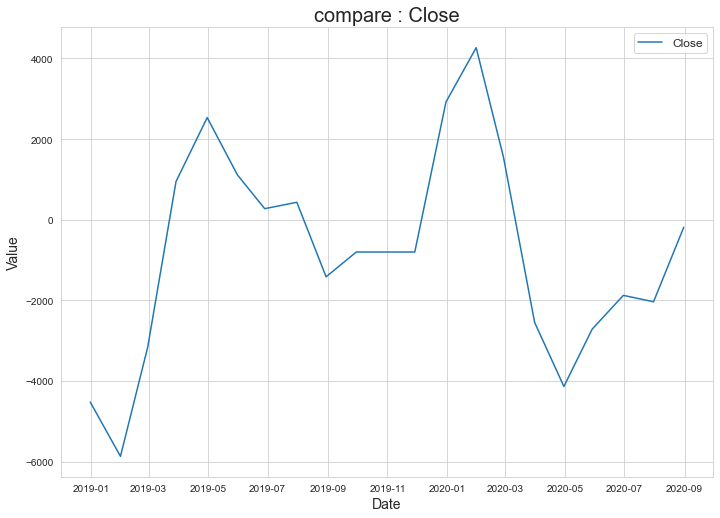

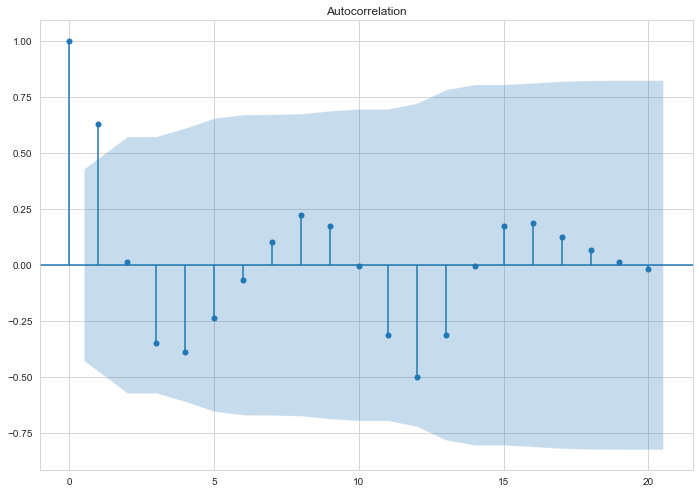

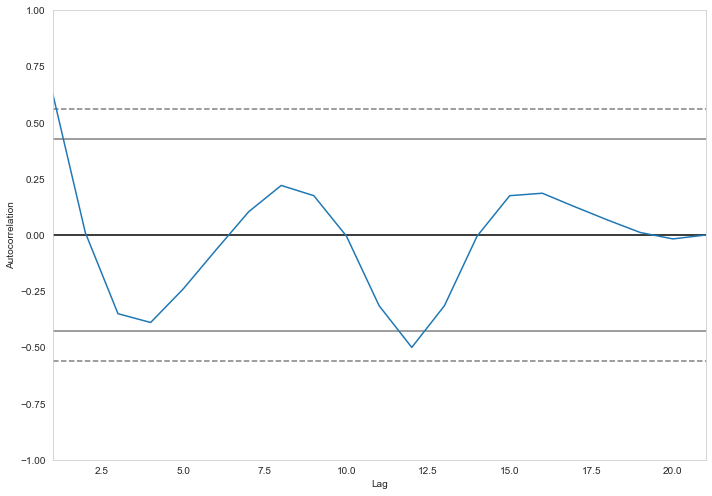

In [48]:
# 영업일 월말 종가 평균의 잔차에 대해서 자기상관 확인
# lag=1 0.66 값에 대해서 약한 양의 상관관계가 있음
samsung_close_bm_res = decompose(samsung_close_bm, type='residual')
samsung_close_bm_res.dropna(axis=0, inplace=True)

autocorr(samsung_close_bm_res['Close'], 10)

graph(samsung_close_bm_res, ['Close'])
autocorrplt(samsung_close_bm_res)

lag=1, autocorr=0.000618436322481632
lag=2, autocorr=0.065476044362864
lag=3, autocorr=-0.010180458734580981
lag=4, autocorr=-0.018997706755087912
lag=5, autocorr=-0.028078988265177754
lag=6, autocorr=-0.035576077452863286
lag=7, autocorr=0.028156248421094945
lag=8, autocorr=0.04844284170227186
lag=9, autocorr=0.011200269933171974
lag=10, autocorr=-0.041497755616587716


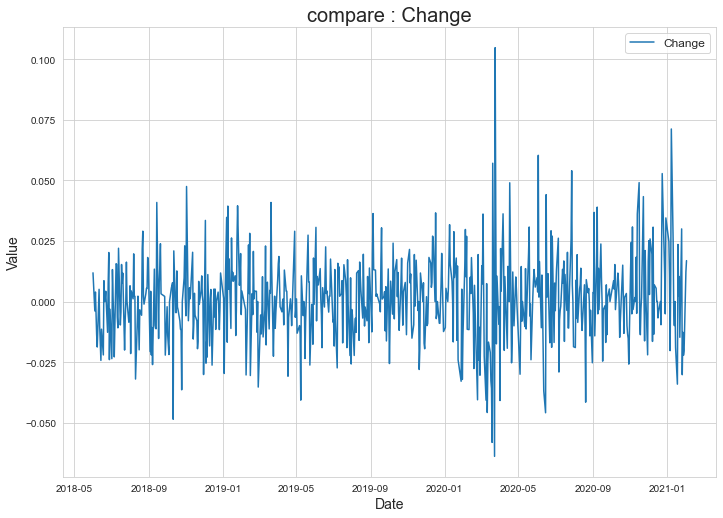

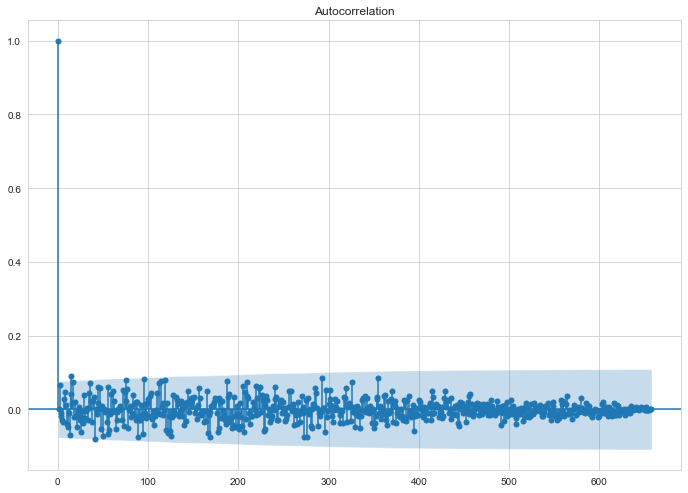

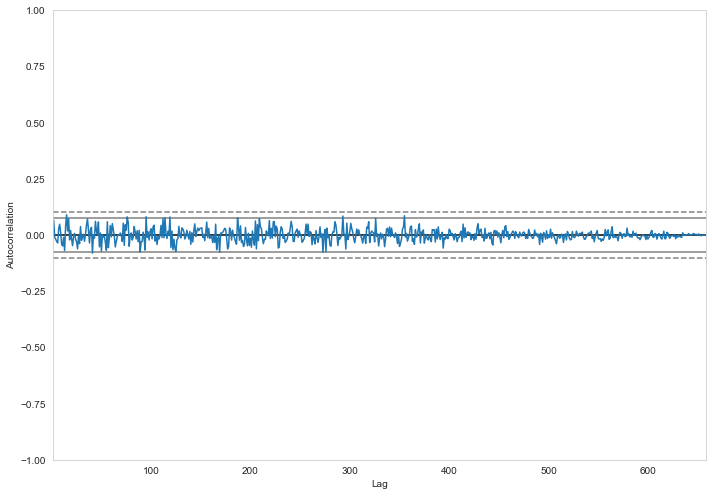

In [23]:
# 종가 변화율은 자기상관관계가 없음
autocorr(samsung_change['Change'], 10)
graph(samsung_change, ['Change'])
autocorrplt(samsung_change)

band : 0.07868894753646337
lag=1, autocorr=-0.09778725066630783
lag=2, autocorr=-0.03634741662703144
lag=3, autocorr=-0.14460226579781607
lag=4, autocorr=-0.15128759471407036
lag=5, autocorr=-0.16018045486094398
lag=6, autocorr=-0.08777200761466555
lag=7, autocorr=0.08449848543384005
lag=8, autocorr=0.10415465925497285
lag=9, autocorr=0.044723110705176955
lag=10, autocorr=-0.02433374145432141


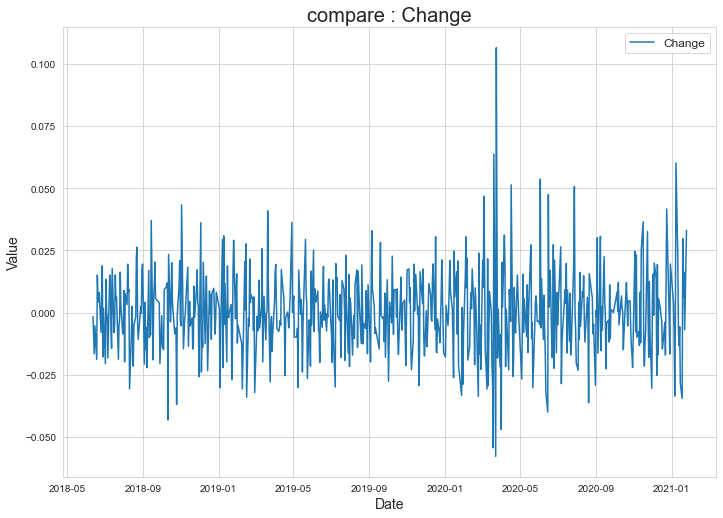

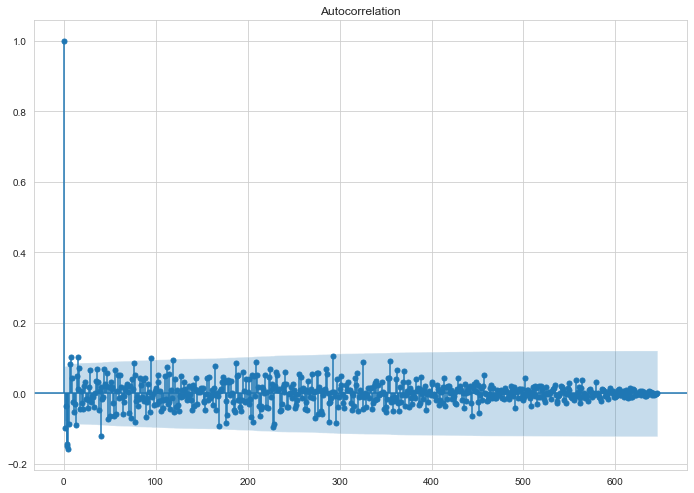

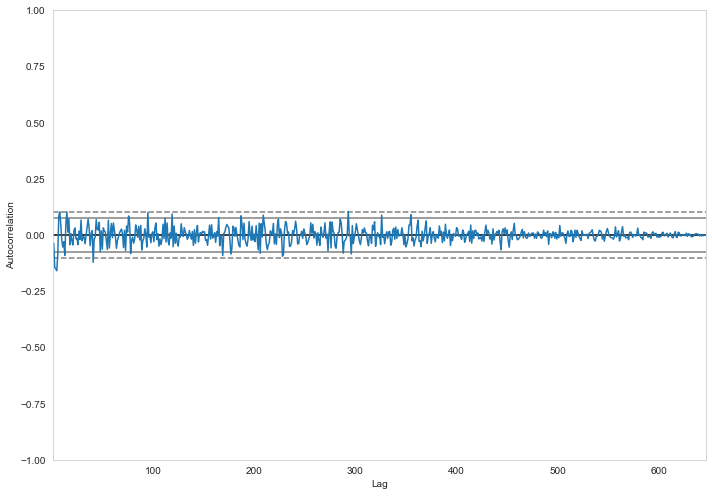

In [47]:
# 종가 변화율의 잔차 : 5일에 약하게 음의 상관관계가 있다
samsung_change_res = decompose(samsung_change, type='residual')
samsung_change_res.dropna(axis=0, inplace=True)

autocorr(samsung_change_res['Change'], 10)

graph(samsung_change_res, ['Change'])
autocorrplt(samsung_change_res)

In [49]:
# O, H, L 변화율의 잔차
samsung_open_change = samsung_open.pct_change().dropna(axis=0)
samsung_open_change_res = decompose(samsung_open_change, type='residual')
samsung_open_change_res.dropna(axis=0, inplace=True)

# open : lag 4, 7
print("1. Open change residual autocorr : ")
print(f"band : {2/np.sqrt(len(samsung_open_change_res.index))}")
autocorr(samsung_open_change_res['Open'], 10)
print()

samsung_high_change = samsung_high.pct_change().dropna(axis=0)
samsung_high_change_res = decompose(samsung_high_change, type='residual')
samsung_high_change_res.dropna(axis=0, inplace=True)

# high : lag 3
print("2. High change residual autocorr : ")
print(f"band : {2/np.sqrt(len(samsung_high_change_res.index))}")
autocorr(samsung_high_change_res['High'], 10)
print()

samsung_low_change = samsung_low.pct_change().dropna(axis=0)
samsung_low_change_res = decompose(samsung_low_change, type='residual')
samsung_low_change_res.dropna(axis=0, inplace=True)

# low : lag 5
print("3. Low change residual autocorr : ")
print(f"band : {2/np.sqrt(len(samsung_low_change_res.index))}")
autocorr(samsung_low_change_res['Low'], 10)

1. Open change residual autocorr : 
band : 0.07874992309581577
lag=1, autocorr=-0.10790822399288294
lag=2, autocorr=-0.08844459909870066
lag=3, autocorr=-0.1239881367828446
lag=4, autocorr=-0.17366367701990484
lag=5, autocorr=-0.09335893699531768
lag=6, autocorr=-0.1001922569315794
lag=7, autocorr=0.17976887057241137
lag=8, autocorr=-0.04538194501416909
lag=9, autocorr=0.1111704032076375
lag=10, autocorr=-0.01896274660012049

2. High change residual autocorr : 
band : 0.07874992309581577
lag=1, autocorr=0.057441708370017976
lag=2, autocorr=-0.14773647518698557
lag=3, autocorr=-0.1843044802997111
lag=4, autocorr=-0.16674134131632695
lag=5, autocorr=-0.16149617696228916
lag=6, autocorr=-0.12841483588778965
lag=7, autocorr=0.11469641379561903
lag=8, autocorr=0.1082598238079191
lag=9, autocorr=0.12218167734885933
lag=10, autocorr=-0.04282935034842858

3. Low change residual autocorr : 
band : 0.07874992309581577
lag=1, autocorr=-0.022750959478694814
lag=2, autocorr=-0.0892707610822519
lag=

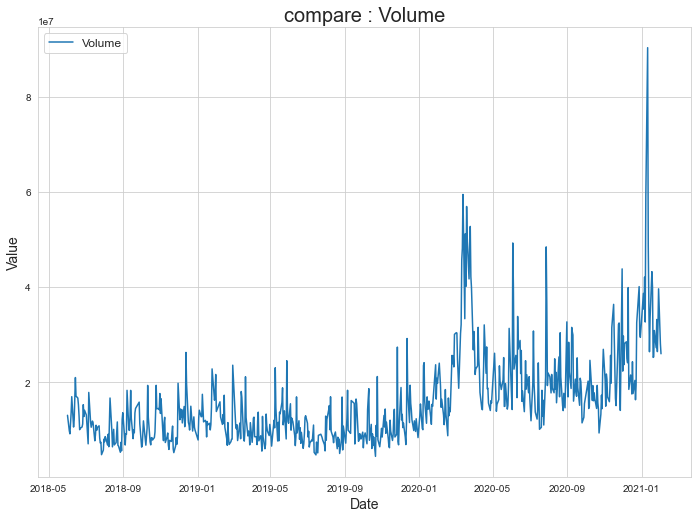

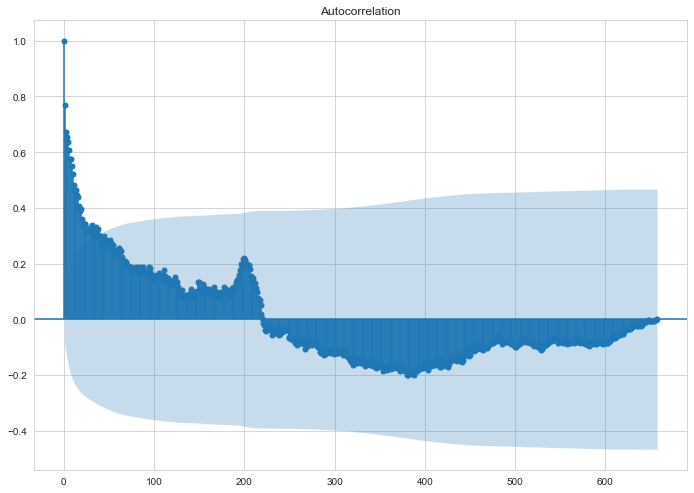

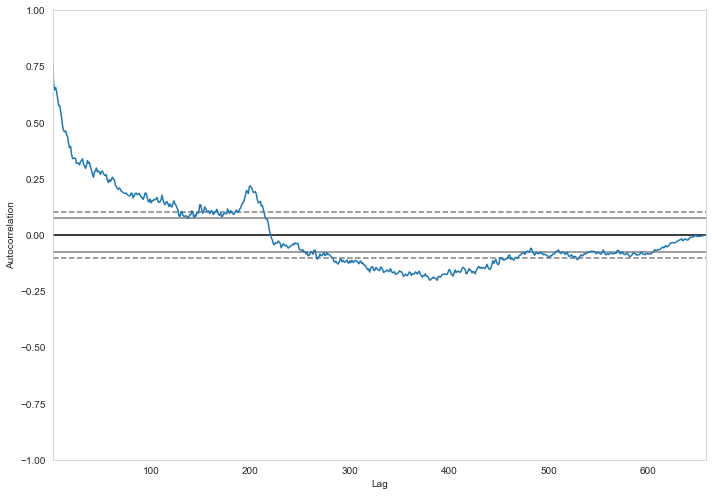

In [50]:
# 거래량
graph(samsung_vol, ['Volume'])
autocorrplt(samsung_vol)

lag=1, autocorr=0.18491831926887436
lag=2, autocorr=-0.16661127963267958
lag=3, autocorr=-0.22812730801919495
lag=4, autocorr=-0.14707851892688042
lag=5, autocorr=-0.15001799149026518
lag=6, autocorr=-0.05044749377849541
lag=7, autocorr=0.016767709370559422
lag=8, autocorr=0.10816423651746152
lag=9, autocorr=0.04919838771297571
lag=10, autocorr=-0.009184021323338674


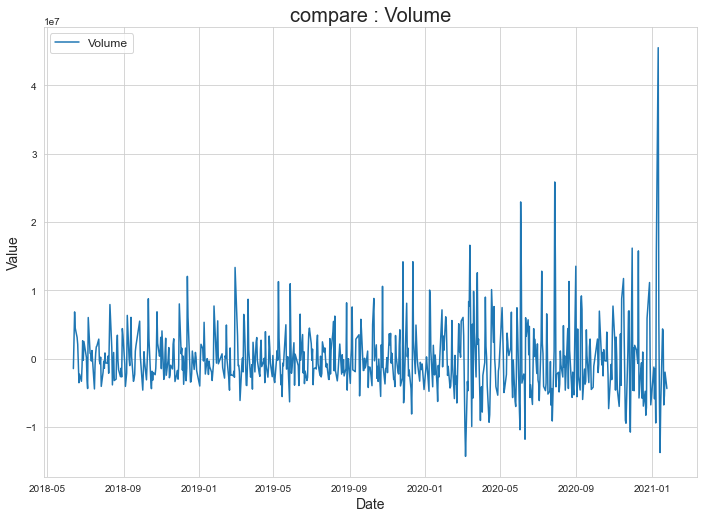

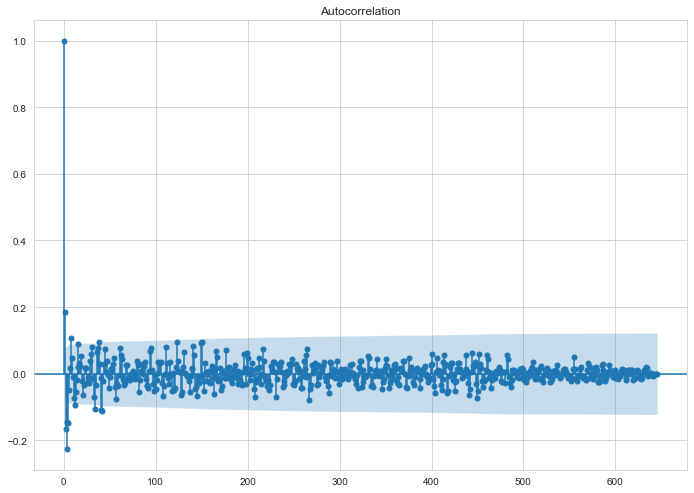

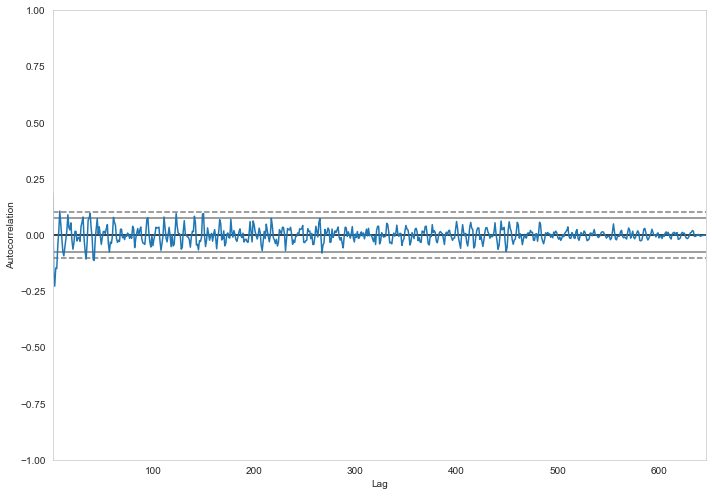

In [51]:
# 거래량의 잔차 : 거래량은 lag=3일때 그나마 음의 관계가 있음
samsung_vol_res = decompose(samsung_vol, type='residual')
samsung_vol_res.dropna(axis=0, inplace=True)

autocorr(samsung_vol_res['Volume'], 10)

graph(samsung_vol_res, ['Volume'])
autocorrplt(samsung_vol_res)

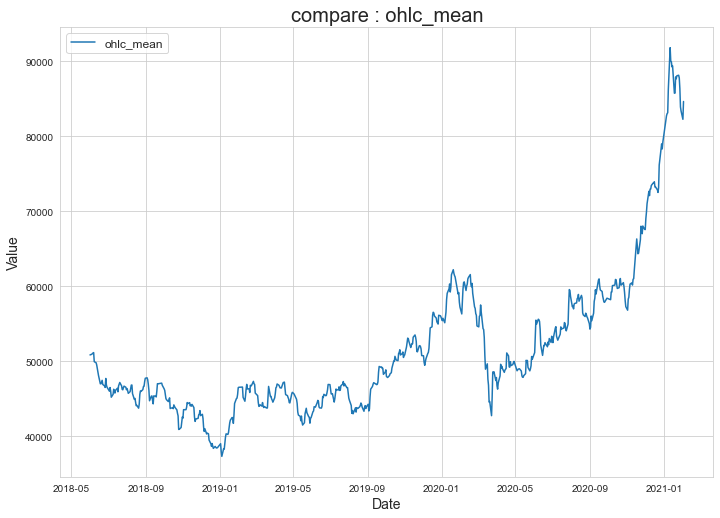

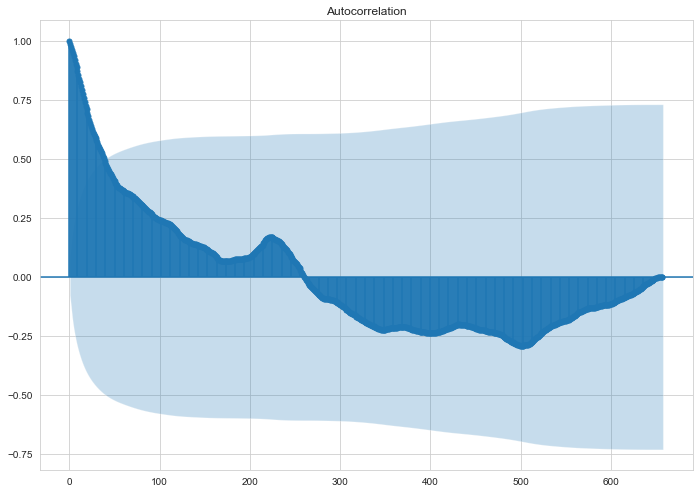

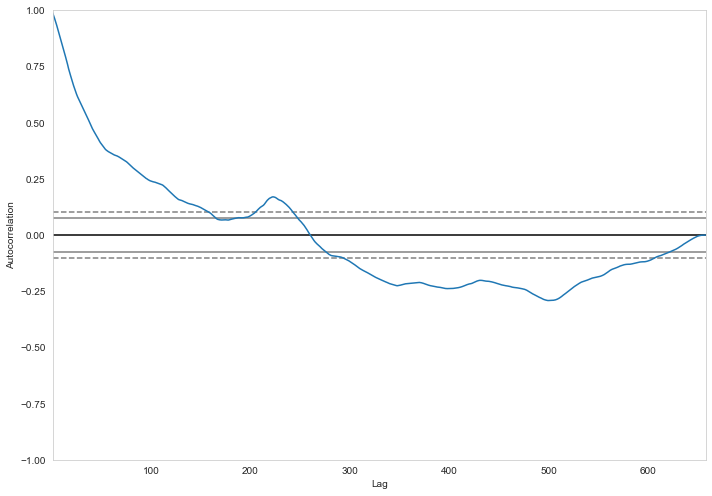

In [52]:
# OHLC 평균값으로 해보기
samsung_ohlcmean = pd.DataFrame(samsung.apply(lambda x: (x['Open'] + x['High'] + x['Low'] + x['Close']) / 4, axis=1), columns=['ohlc_mean'])

graph(samsung_ohlcmean, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean)

lag=1, autocorr=0.6498189479810784
lag=2, autocorr=0.21708745493193252
lag=3, autocorr=-0.11275049965178524
lag=4, autocorr=-0.30000520556153726
lag=5, autocorr=-0.3592897836538946
lag=6, autocorr=-0.27358629024107595
lag=7, autocorr=-0.08835458181870974
lag=8, autocorr=-0.016346828704764473
lag=9, autocorr=-0.028717687633924866
lag=10, autocorr=-0.11842226659648016


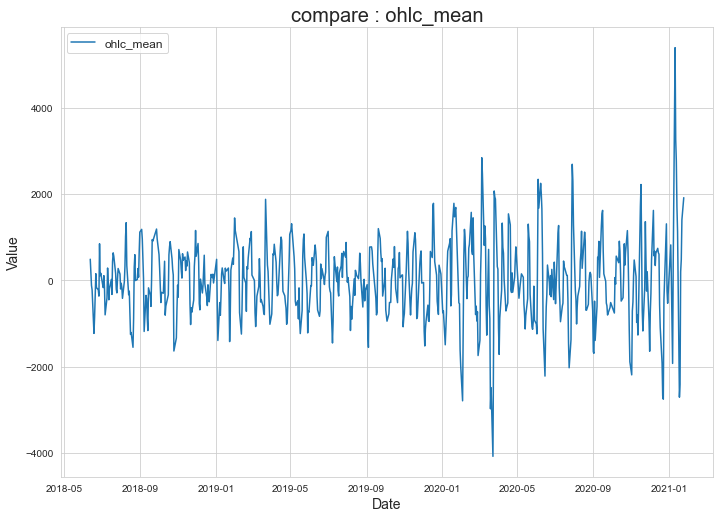

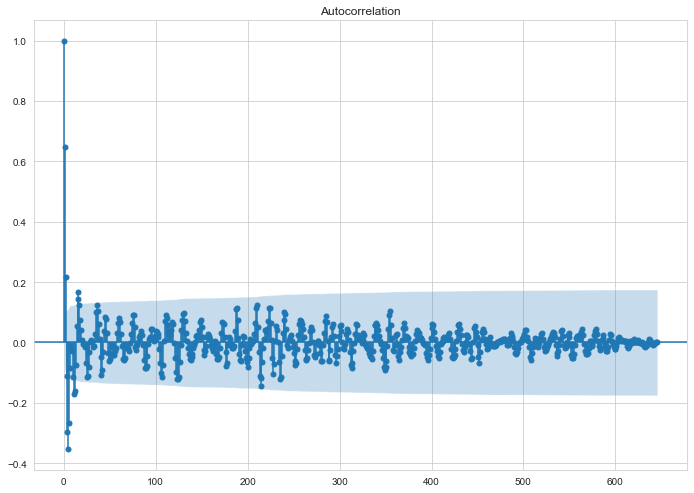

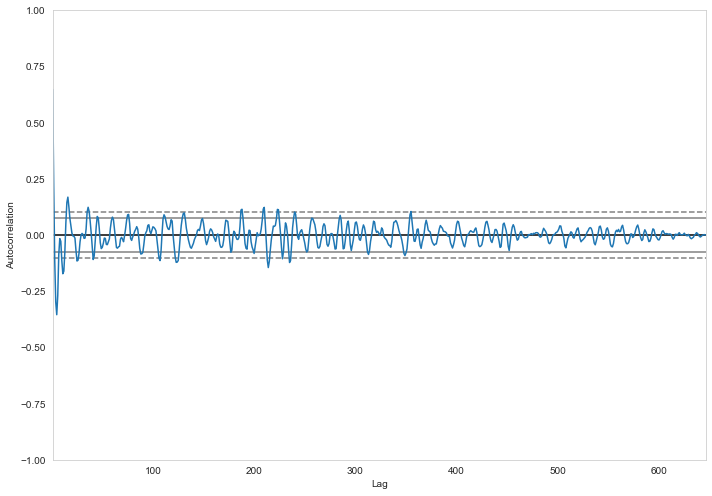

In [53]:
# OHLC 평균값의 잔차 : lag 1일때 양의 상관, lag 5일때 음의 상관관계
samsung_ohlcmean_res = decompose(samsung_ohlcmean, type='residual')
samsung_ohlcmean_res.dropna(axis=0, inplace=True)

autocorr(samsung_ohlcmean_res['ohlc_mean'], 10)

graph(samsung_ohlcmean_res, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean_res)

lag=1, autocorr=0.9370107801478889
lag=2, autocorr=0.857284682215048
lag=3, autocorr=0.7645296675187874
lag=4, autocorr=0.6933468302568915
lag=5, autocorr=0.6497131366594466
lag=6, autocorr=0.5868960512941261
lag=7, autocorr=0.539346233113505
lag=8, autocorr=0.4645287716750217
lag=9, autocorr=0.4341490879715908
lag=10, autocorr=0.5514789899362508


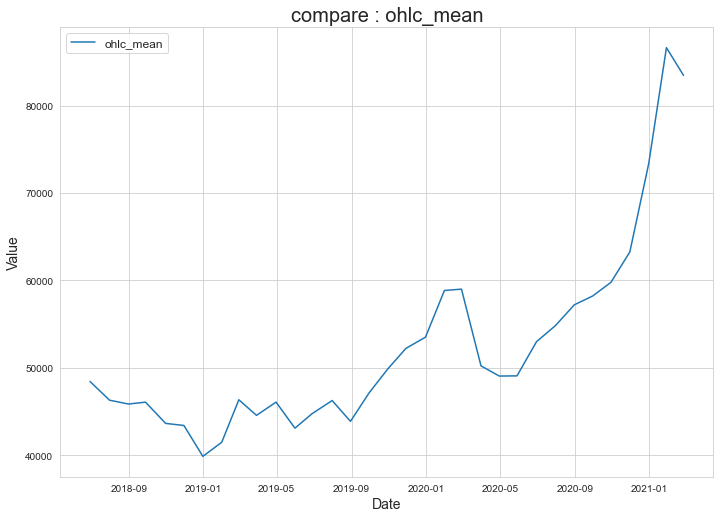

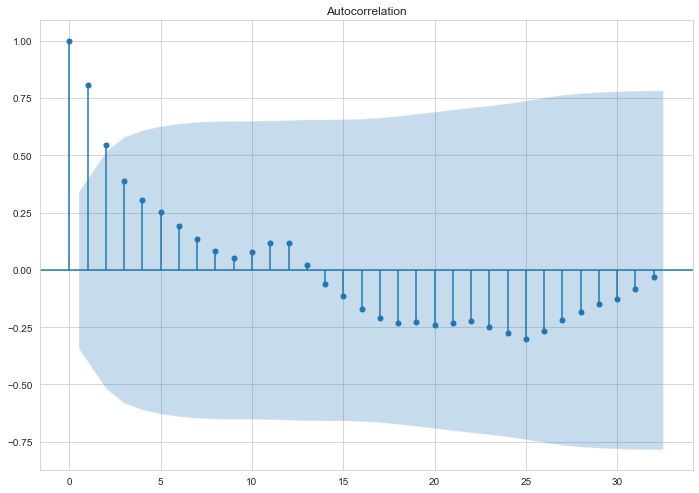

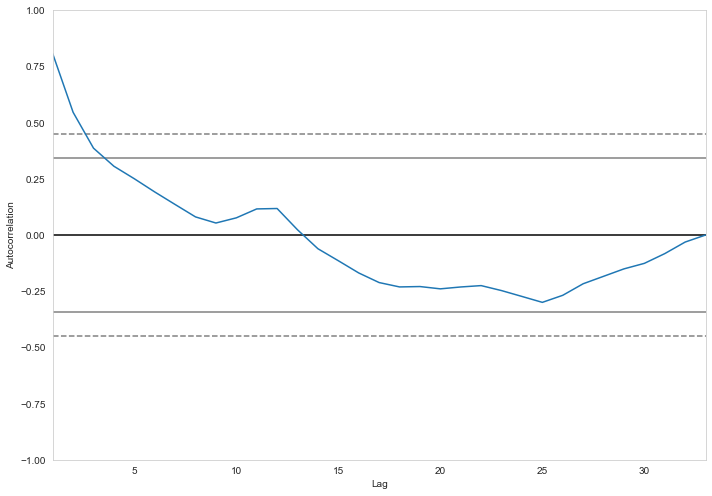

In [54]:
# OHLC 평균값의 영업일 월말 평균에 대해서 자기상관 확인
samsung_ohlcmean_bm = samsung_ohlcmean.resample('BM').mean()

autocorr(samsung_ohlcmean_bm['ohlc_mean'], 10)

graph(samsung_ohlcmean_bm, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean_bm)

lag=1, autocorr=0.6654557205895841
lag=2, autocorr=0.005151136555863312
lag=3, autocorr=-0.4731293807099574
lag=4, autocorr=-0.5508043477594486
lag=5, autocorr=-0.3911878487415895
lag=6, autocorr=-0.12478744958173475
lag=7, autocorr=0.162000715712931
lag=8, autocorr=0.4146916120413543
lag=9, autocorr=0.3684598452583144
lag=10, autocorr=0.0029515956124186527


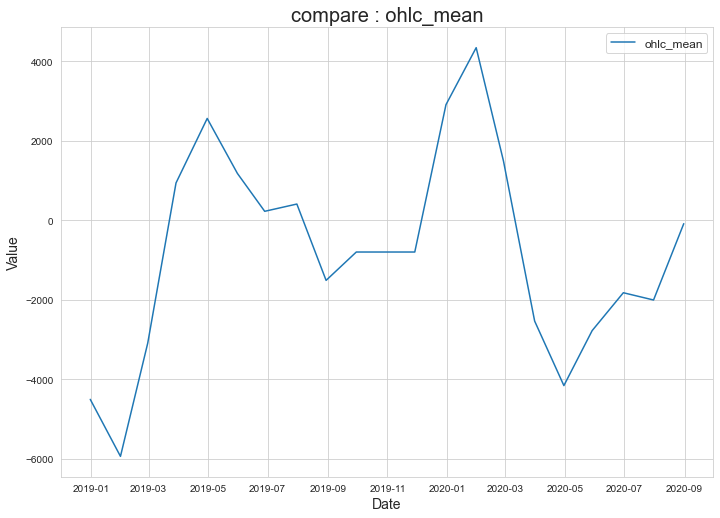

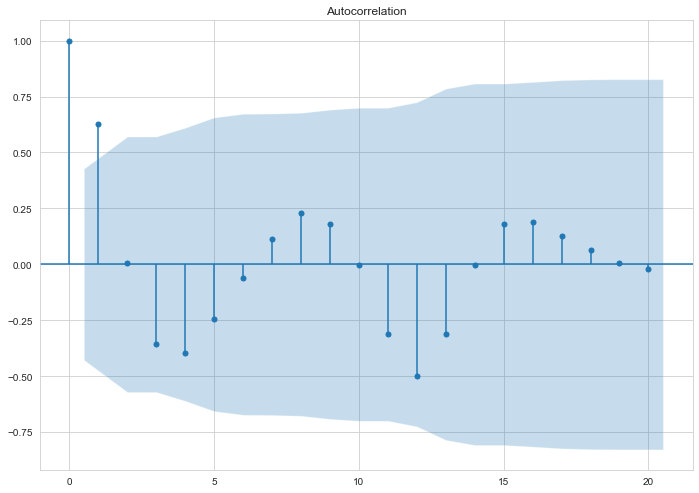

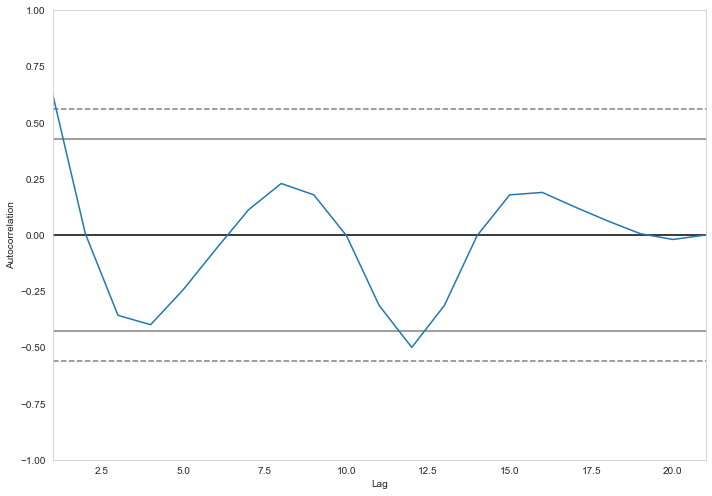

In [55]:
# OHLC 평균값의 영업일 월말 평균의 잔차
samsung_ohlcmean_bm_res = decompose(samsung_ohlcmean_bm, type='residual')
samsung_ohlcmean_bm_res.dropna(axis=0, inplace=True)

autocorr(samsung_ohlcmean_bm_res['ohlc_mean'], 10)

graph(samsung_ohlcmean_bm_res, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean_bm_res)

lag=1, autocorr=0.22404076221286554
lag=2, autocorr=0.03887120864086256
lag=3, autocorr=-0.030847045403065917
lag=4, autocorr=-0.007479034357868465
lag=5, autocorr=-0.025621792663941646
lag=6, autocorr=-0.07430293579405076
lag=7, autocorr=0.09294207000865261
lag=8, autocorr=0.00930553032200579
lag=9, autocorr=0.03241822385052818
lag=10, autocorr=-0.04096139483225992


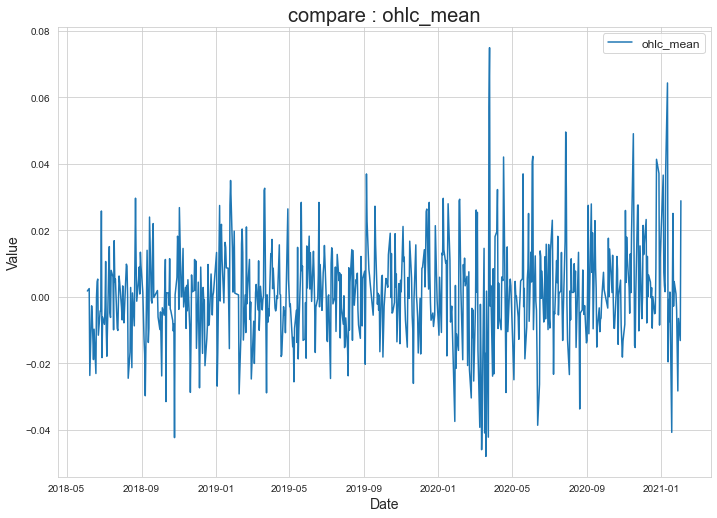

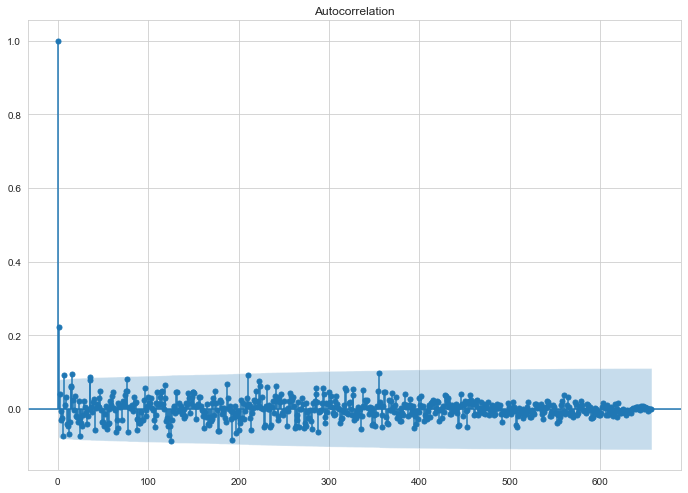

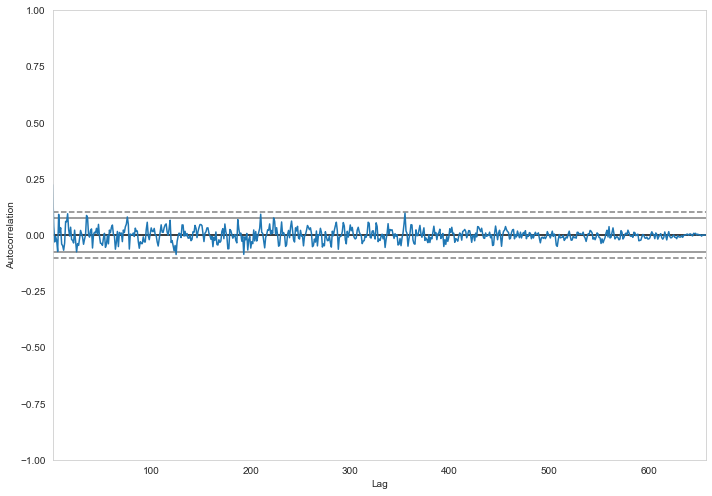

In [56]:
# OHLC 평균값의 변화율의 자기상관
samsung_ohlcmean_change = samsung_ohlcmean.pct_change().dropna(axis=0)

autocorr(samsung_ohlcmean_change['ohlc_mean'], 10)

graph(samsung_ohlcmean_change, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean_change)

lag=1, autocorr=0.11505069006101173
lag=2, autocorr=-0.11736954936892822
lag=3, autocorr=-0.20942157808069362
lag=4, autocorr=-0.19696281370701232
lag=5, autocorr=-0.20737882078136743
lag=6, autocorr=-0.14406064051061415
lag=7, autocorr=0.16230804799066395
lag=8, autocorr=0.08449127826341306
lag=9, autocorr=0.08811824328540012
lag=10, autocorr=-0.028227989286502657


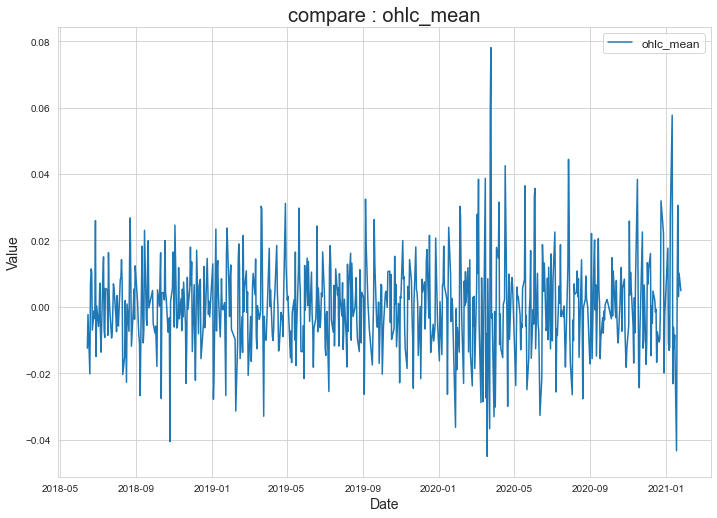

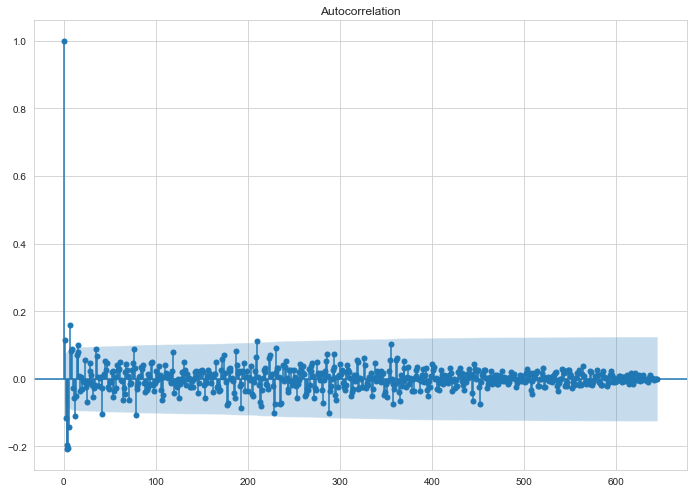

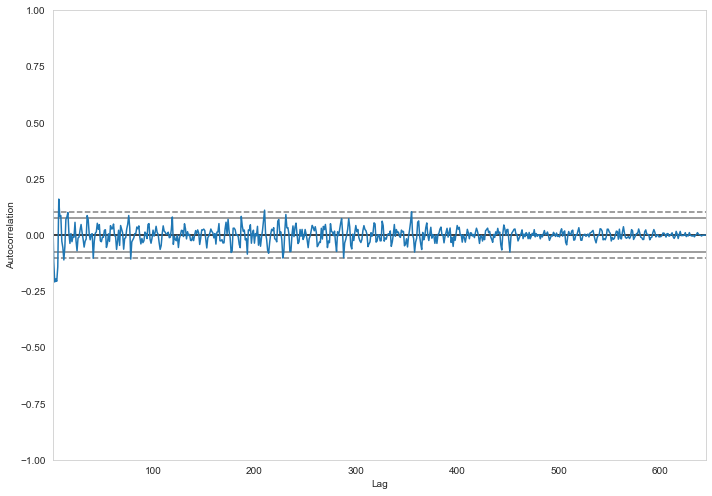

In [57]:
# OHLC 평균값의 변화율 잔차의 자기상관 : lag=3, 5 일때 음의 상관 / 7일때 양의 상관
samsung_ohlcmean_change_res = decompose(samsung_ohlcmean_change, type='residual')
samsung_ohlcmean_change_res.dropna(axis=0, inplace=True)

autocorr(samsung_ohlcmean_change_res['ohlc_mean'], 10)

graph(samsung_ohlcmean_change_res, ['ohlc_mean'])
autocorrplt(samsung_ohlcmean_change_res)